In [ ]:
!pip install tensorflow

In [ ]:
!pip install pandas numpy scikit-learn tensorflow imbalanced-learn matplotlib


In [ ]:
!pip install keras

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential  # Use keras
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier  # Use scikeras for KerasClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, make_scorer, precision_score, recall_score
# Step 1: Load your data
# Assuming you have already loaded your CSV into a DataFrame 'df'
# df = pd.read_csv('your_file.csv')

# Step 2: Prepare your features (X) and target (y)
X = df.drop(columns=['popular'])  # Replace with your actual target column name
y = df['popular']  # Replace with your actual target column name

# Step 3: Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 4: Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define a function to create the model
def create_model(units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(units // 2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Create a KerasClassifier without activation and optimizer
model = KerasClassifier(build_fn=create_model, verbose=0)

# Step 8: Define the grid search parameters
param_grid = {
    'epochs': [10, 20, 30],
    'batch_size': [16, 32],
    'model__units': [32, 64, 128],  # Use model__units
    'model__activation': ['relu', 'tanh'],  # Use model__activation
    'model__optimizer': ['adam', 'sgd'],  # Use model__optimizer
}

# Step 9: Create scoring functions for precision and recall
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Step 10: Create GridSearchCV with multiple metrics
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='accuracy', n_jobs=-1, cv=3)

# Step 11: Fit the grid search
grid_result = grid.fit(X_train_scaled, y_train)

# Step 12: Summarize the results
print(f"Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}")

# Step 13: Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Step 14: Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))





/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Accuracy: 0.7646081883314911 using {'batch_size': 32, 'epochs': 20, 'model__activation': 'tanh', 'model__optimizer': 'sgd', 'model__units': 32}
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4000
           1       0.74      0.80      0.77      3976

    accuracy                           0.76      7976
   macro avg       0.76      0.76      0.76      7976
weighted avg       0.76      0.76      0.76      7976



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5875 - loss: 0.6680 - val_accuracy: 0.7172 - val_loss: 0.5612
Epoch 2/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7329 - loss: 0.5382 - val_accuracy: 0.7454 - val_loss: 0.5200
Epoch 3/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7524 - loss: 0.5037 - val_accuracy: 0.7495 - val_loss: 0.5092
Epoch 4/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7565 - loss: 0.4994 - val_accuracy: 0.7484 - val_loss: 0.5038
Epoch 5/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7615 - loss: 0.4871 - val_accuracy: 0.7539 - val_loss: 0.4998
Epoch 6/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7644 - loss: 0.4851 - val_accuracy: 0.7569 - val_loss: 0.4983
Epoch 7/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7644 - loss: 0.4808 - val_accuracy: 0.7549 - val_loss: 0.4970
Epoch 8/20
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7686 - loss: 0.4786 - val_accuracy: 0.

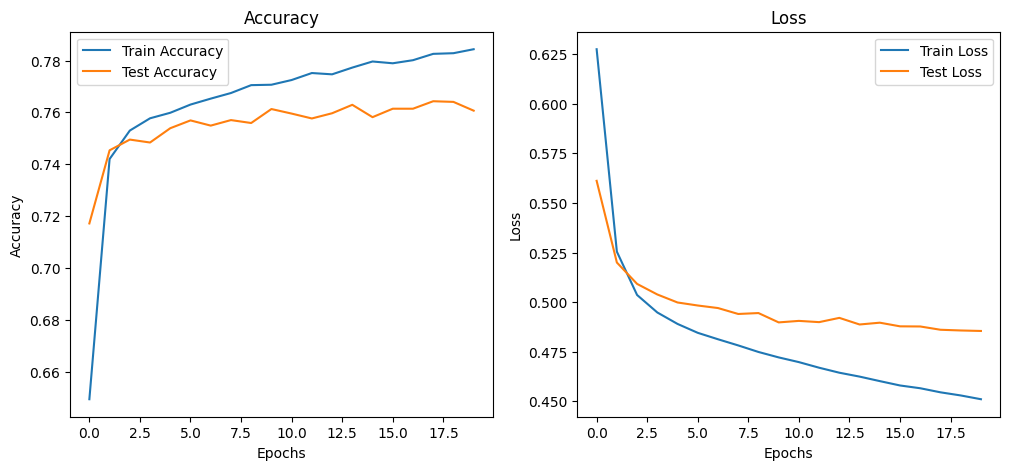

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load your data
# Assuming you have already loaded your CSV into a DataFrame 'df'
# df = pd.read_csv('your_file.csv')

# Step 2: Prepare your features (X) and target (y)
X = df.drop(columns=['popular'])  # Replace 'popular' with your actual target column name
y = df['popular']  # Replace 'popular' with your actual target column name

# Step 3: Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 4: Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the deeper model
def create_deeper_model(units=32, activation='tanh', optimizer='sgd'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))  # First layer
    model.add(Dense(units, activation=activation))  # Second hidden layer
    model.add(Dense(units // 2, activation=activation))  # Third hidden layer
    model.add(Dense(units // 4, activation=activation))  # Fourth hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Create the model with the best parameters
deeper_model = create_deeper_model(units=32, activation='tanh', optimizer='sgd')

# Step 8: Train the model and track validation metrics
history = deeper_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Step 9: Evaluate the model on the test set
y_test_pred = deeper_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Step 10: Evaluate the model on the training set (to check for overfitting)
y_train_pred = deeper_model.predict(X_train_scaled)
y_train_pred = (y_train_pred > 0.5).astype(int)

# Step 11: Generate the classification report for both training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Step 12: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5729 - loss: 0.6787 - val_accuracy: 0.7272 - val_loss: 0.5573
Epoch 2/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7394 - loss: 0.5335 - val_accuracy: 0.7422 - val_loss: 0.5136
Epoch 3/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7545 - loss: 0.5030 - val_accuracy: 0.7454 - val_loss: 0.5077
Epoch 4/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7598 - loss: 0.4936 - val_accuracy: 0.7499 - val_loss: 0.5029
Epoch 5/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7598 - loss: 0.4918 - val_accuracy: 0.7501 - val_loss: 0.4996
Epoch 6/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7642 - loss: 0.4862 - val_accuracy: 0.7516 - val_loss: 0.4983
Epoch 7/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7718 - loss: 0.4783 - val_accuracy: 0.7533 - val_loss: 0.4970
Epoch 8/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7714 - loss: 0.4784 - val_accuracy: 0.

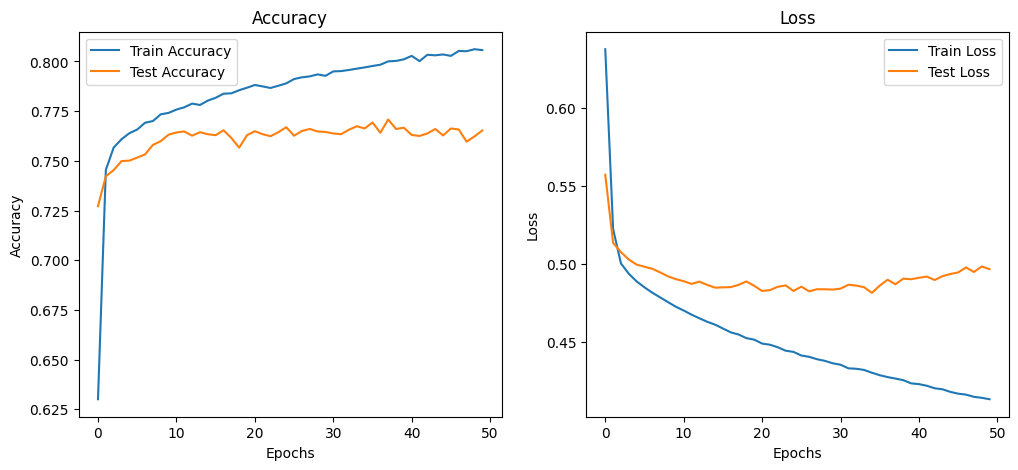

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load your data
# Assuming you have already loaded your CSV into a DataFrame 'df'
# df = pd.read_csv('your_file.csv')

# Step 2: Prepare your features (X) and target (y)
X = df.drop(columns=['popular'])  # Replace 'popular' with your actual target column name
y = df['popular']  # Replace 'popular' with your actual target column name

# Step 3: Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 4: Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the deeper model
def create_deeper_model(units=32, activation='tanh', optimizer='sgd'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))  # First layer
    model.add(Dense(units, activation=activation))  # Second hidden layer
    model.add(Dense(units // 2, activation=activation))  # Third hidden layer
    model.add(Dense(units // 4, activation=activation))  # Fourth hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Create the model with the best parameters
deeper_model = create_deeper_model(units=32, activation='tanh', optimizer='sgd')

# Step 8: Train the model and track validation metrics
history = deeper_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Step 9: Evaluate the model on the test set
y_test_pred = deeper_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Step 10: Evaluate the model on the training set (to check for overfitting)
y_train_pred = deeper_model.predict(X_train_scaled)
y_train_pred = (y_train_pred > 0.5).astype(int)

# Step 11: Generate the classification report for both training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Step 12: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


997/997 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5524 - loss: 0.7367 - val_accuracy: 0.7224 - val_loss: 0.5762
Epoch 2/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6818 - loss: 0.6007 - val_accuracy: 0.7400 - val_loss: 0.5309
Epoch 3/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7248 - loss: 0.5536 - val_accuracy: 0.7449 - val_loss: 0.5180
Epoch 4/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7324 - loss: 0.5408 - val_accuracy: 0.7447 - val_loss: 0.5141
Epoch 5/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7390 - loss: 0.5327 - val_accuracy: 0.7457 - val_loss: 0.5114
Epoch 6/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7479 - loss: 0.5195 - val_accuracy: 0.7476 - val_loss: 0.5098
Epoch 7/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7343 - loss: 0.5356 - val_accuracy: 0.7486 - val_loss: 0.5090
Epoch 8/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7454 - loss: 0.5200 - val_accuracy: 0.7470 - val_

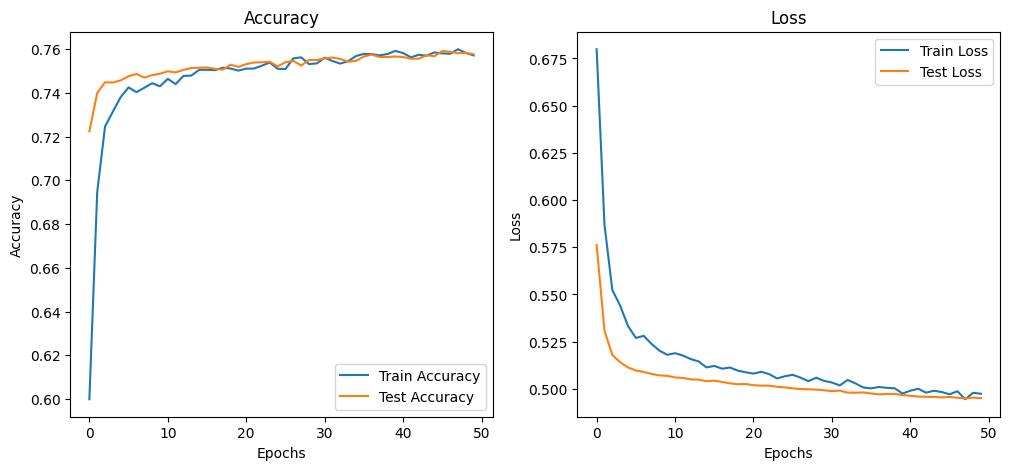

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout  # Import Dropout layer
from keras.callbacks import EarlyStopping  # Import EarlyStopping
from sklearn.metrics import classification_report

# Step 1-5: Same as before (loading data, scaling, etc.)
# Step 2: Prepare your features (X) and target (y)
X = df.drop(columns=['popular'])  # Replace 'popular' with your actual target column name
y = df['popular']  # Replace 'popular' with your actual target column name

# Step 3: Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 4: Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define a function to create the model with Dropout
def create_model(units=64, activation='relu', optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))  # Dropout layer after first dense layer
    model.add(Dense(units // 2, activation=activation))
    model.add(Dropout(dropout_rate))  # Dropout after second dense layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Use EarlyStopping with patience of 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 8: Set best parameters and increase epochs to 50
model = create_model(units=32, activation='tanh', optimizer='sgd', dropout_rate=0.3)  # Set best params

# Step 9: Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Step 10: Evaluate the model
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Step 11: Generate classification reports for training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Step 12: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
# Variation 1: Complex Architecture with Additional Layers
def complex_model():
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, BatchNormalization
    from keras.callbacks import EarlyStopping
    from sklearn.metrics import classification_report
    from imblearn.under_sampling import RandomUnderSampler

    # Data preparation steps remain the same
    X = df.drop(columns=['popular'])
    y = df['popular']

    # Undersample
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Complex model architecture
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss',
                                 patience=10,
                                 restore_best_weights=True)

    history = model.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       epochs=100,
                       batch_size=64,
                       callbacks=[early_stopping],
                       verbose=1)

    return model, history

# Variation 2: Advanced Dropout Configuration
def advanced_dropout_model():
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from keras.callbacks import EarlyStopping
    from keras.regularizers import l2
    from sklearn.metrics import classification_report
    from imblearn.under_sampling import RandomUnderSampler

    # Data preparation steps remain the same
    X = df.drop(columns=['popular'])
    y = df['popular']

    # Undersample
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model with carefully tuned dropout
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
              kernel_regularizer=l2(0.01)),
        Dropout(0.4),

        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),

        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss',
                                 patience=15,
                                 restore_best_weights=True)

    history = model.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stopping],
                       verbose=1)

    return model, history

# Variation 3: Combined Sampling Techniques
def combined_sampling_model():
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from keras.callbacks import EarlyStopping
    from sklearn.metrics import classification_report
    from imblearn.combine import SMOTETomek

    # Data preparation
    X = df.drop(columns=['popular'])
    y = df['popular']

    # Combined SMOTE and Tomek links
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model architecture
    model = Sequential([
        Dense(48, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.3),

        Dense(24, activation='relu'),
        Dropout(0.2),

        Dense(12, activation='relu'),
        Dropout(0.1),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss',
                                 patience=10,
                                 restore_best_weights=True)

    history = model.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       epochs=75,
                       batch_size=32,
                       callbacks=[early_stopping],
                       verbose=1)

    return model, history

# Utility function to evaluate and compare models
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    y_train_pred = (model.predict(X_train_scaled) > 0.5).astype("int32")
    y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

    print(f"\nResults for {model_name}")
    print("\nClassification Report for Training Set:")
    print(classification_report(y_train, y_train_pred))
    print("\nClassification Report for Test Set:")
    print(classification_report(y_test, y_test_pred))

    return y_train_pred, y_test_pred

# Example usage:
# For Complex Architecture
model1, history1 = complex_model()
evaluate_model(model1, X_train_scaled, X_test_scaled, y_train, y_test, "Complex Architecture")

# For Advanced Dropout
model2, history2 = advanced_dropout_model()
evaluate_model(model2, X_train_scaled, X_test_scaled, y_train, y_test, "Advanced Dropout")

# For Combined Sampling
model3, history3 = combined_sampling_model()
evaluate_model(model3, X_train_scaled, X_test_scaled, y_train, y_test, "Combined Sampling")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6315 - loss: 0.6651 - val_accuracy: 0.7464 - val_loss: 0.5087
Epoch 2/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7360 - loss: 0.5303 - val_accuracy: 0.7534 - val_loss: 0.5000
Epoch 3/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7465 - loss: 0.5145 - val_accuracy: 0.7516 - val_loss: 0.4955
Epoch 4/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7539 - loss: 0.5024 - val_accuracy: 0.7541 - val_loss: 0.4944
Epoch 5/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7561 - loss: 0.4965 - val_accuracy: 0.7585 - val_loss: 0.4926
Epoch 6/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7648 - loss: 0.4877 - val_accuracy: 0.7598 - val_loss: 0.4898
Epoch 7/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7592 - loss: 0.4877 - val_accuracy: 0.7569 - val_loss: 0.4876
Epoch 8/100
499/499 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7647 - loss: 0.4838 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


997/997 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6215 - loss: 1.3168 - val_accuracy: 0.7363 - val_loss: 0.5969
Epoch 2/100
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7463 - loss: 0.5893 - val_accuracy: 0.7445 - val_loss: 0.5664
Epoch 3/100
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7461 - loss: 0.5665 - val_accuracy: 0.7494 - val_loss: 0.5541
Epoch 4/100
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7451 - loss: 0.5600 - val_accuracy: 0.7393 - val_loss: 0.5562
Epoch 5/100
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7467 - loss: 0.5592 - val_accuracy: 0.7442 - val_loss: 0.5555
Epoch 6/100
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7424 - loss: 0.5584 - val_accuracy: 0.7444 - val_loss: 0.5511
Epoch 7/100
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7436 - loss: 0.5595 - val_accuracy: 0.7454 - val_loss: 0.5487
Epoch 8/100
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7484 - loss: 0.5534 - val_accuracy: 0.7494

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8128 - loss: 0.4023 - val_accuracy: 0.8636 - val_loss: 0.2785
Epoch 2/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8693 - loss: 0.2793 - val_accuracy: 0.8678 - val_loss: 0.2714
Epoch 3/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8728 - loss: 0.2731 - val_accuracy: 0.8708 - val_loss: 0.2705
Epoch 4/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8765 - loss: 0.2683 - val_accuracy: 0.8740 - val_loss: 0.2668
Epoch 5/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8777 - loss: 0.2647 - val_accuracy: 0.8736 - val_loss: 0.2666
Epoch 6/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8764 - loss: 0.2657 - val_accuracy: 0.8748 - val_loss: 0.2668
Epoch 7/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8798 - loss: 0.2620 - val_accuracy: 0.8755 - val_loss: 0.2648
Epoch 8/75
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8810 - loss: 0.2596 -

(array([[1],
        [0],
        [1],
        ...,
        [1],
        [1],
        [0]], dtype=int32),
 array([[1],
        [0],
        [0],
        ...,
        [1],
        [0],
        [1]], dtype=int32))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Evaluating Random Forest with none sampling...
Accuracy: 0.8341
AUC-ROC: 0.8582

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     13917
           1       0.71      0.43      0.54      4008

    accuracy                           0.83     17925
   macro avg       0.78      0.69      0.72     17925
weighted avg       0.82      0.83      0.82     17925


Evaluating XGBoost with none sampling...
Accuracy: 0.8254
AUC-ROC: 0.8480

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     13917
           1       0.71      0.37      0.49      4008

    accuracy                           0.83     17925
   macro avg       0.78      0.66      0.69     17925
weighted avg       0.81      0.83      0.80     17925


Evaluating Decision Tree with none sampling...
Accuracy: 0.7785
AUC-ROC: 0.6813

Classification Report:
              precision    recall  f1

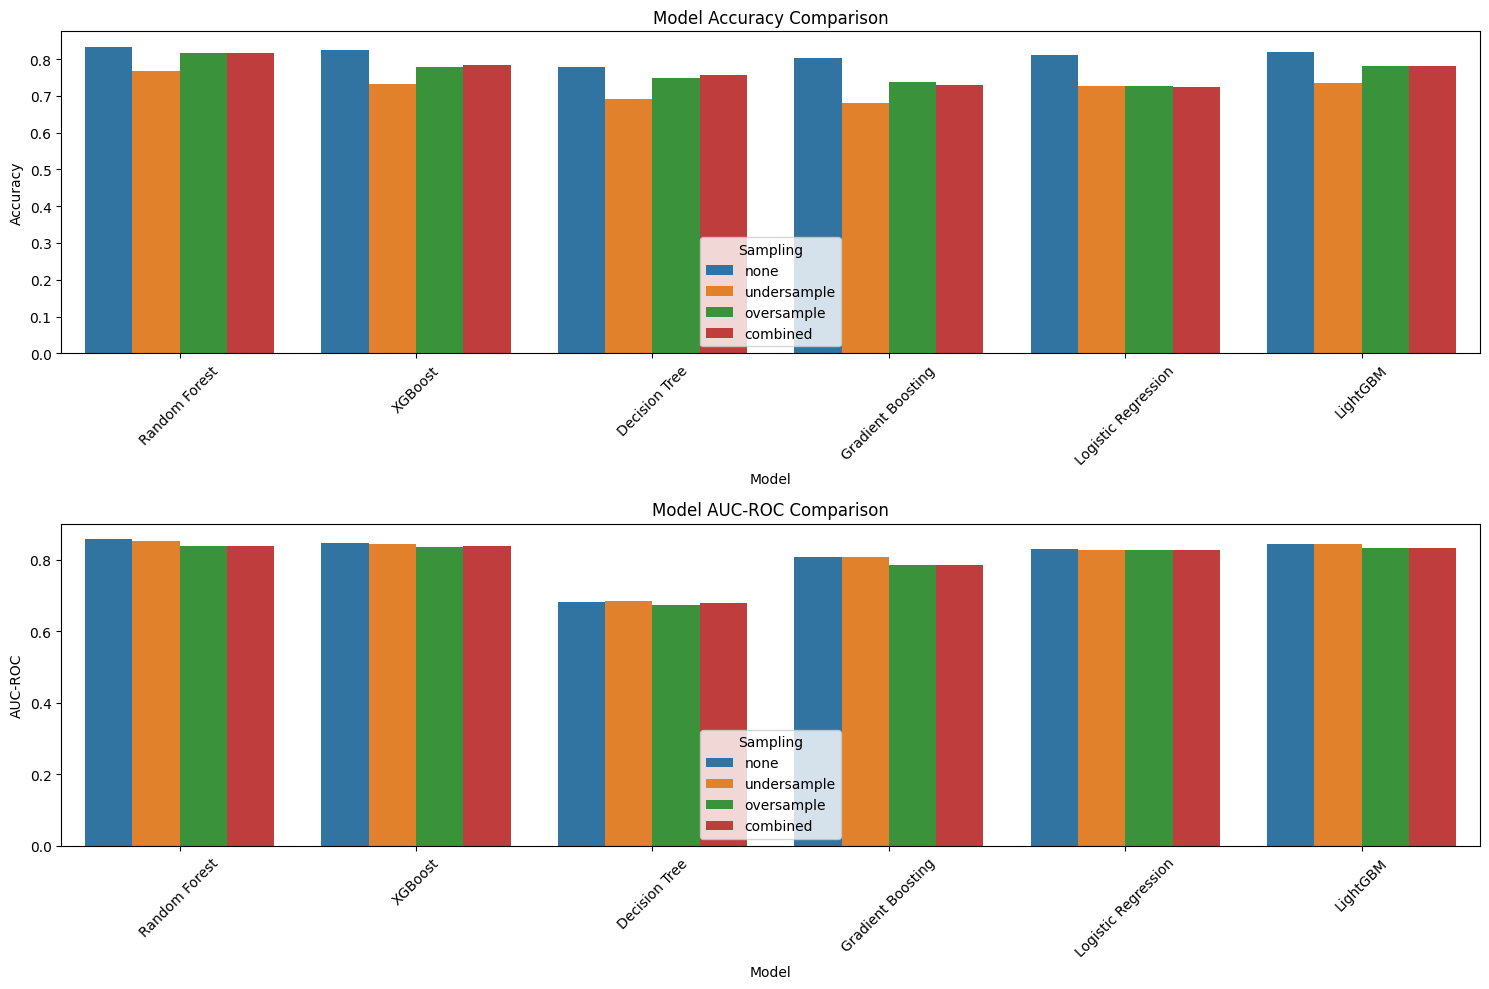

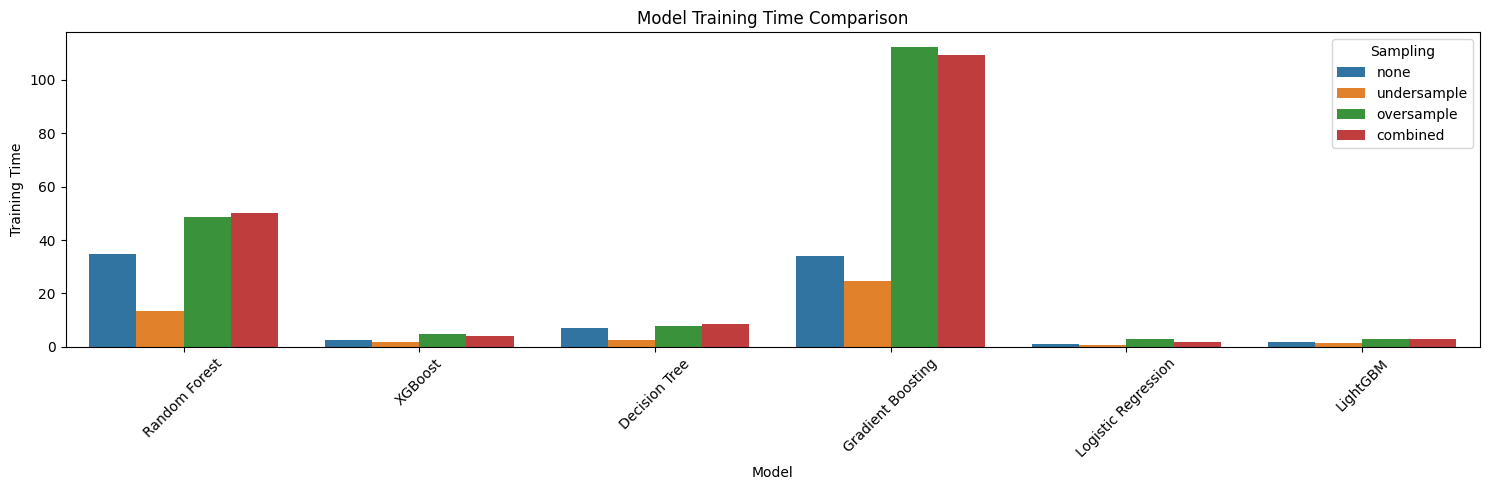


Detailed Results:
                  Model     Sampling  Accuracy   AUC-ROC  Training Time
18        Random Forest     combined  0.815788  0.840183      50.275727
19              XGBoost     combined  0.785328  0.838223       3.915874
23             LightGBM     combined  0.781702  0.833871       2.955970
20        Decision Tree     combined  0.756151  0.680036       8.672229
21    Gradient Boosting     combined  0.729986  0.785168     109.215499
22  Logistic Regression     combined  0.725411  0.827835       1.736096
0         Random Forest         none  0.834086  0.858230      34.880988
1               XGBoost         none  0.825384  0.848034       2.720409
5              LightGBM         none  0.818577  0.844386       1.793128
4   Logistic Regression         none  0.810321  0.829803       0.873760
3     Gradient Boosting         none  0.803124  0.807961      34.177209
2         Decision Tree         none  0.778522  0.681263       7.153585
12        Random Forest   oversample  0.81550

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

class ModelEvaluator:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.results = []
        self.scaler = StandardScaler()

    def prepare_data(self, sampling_technique=None):
        # Split data first
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Apply sampling technique if specified
        if sampling_technique == 'undersample':
            sampler = RandomUnderSampler(random_state=42)
            X_train_sampled, y_train_sampled = sampler.fit_resample(X_train_scaled, y_train)
        elif sampling_technique == 'oversample':
            sampler = SMOTE(random_state=42)
            X_train_sampled, y_train_sampled = sampler.fit_resample(X_train_scaled, y_train)
        elif sampling_technique == 'combined':
            sampler = SMOTETomek(random_state=42)
            X_train_sampled, y_train_sampled = sampler.fit_resample(X_train_scaled, y_train)
        else:
            X_train_sampled, y_train_sampled = X_train_scaled, y_train

        return X_train_sampled, X_test_scaled, y_train_sampled, y_test

    def evaluate_model(self, model, X_train, X_test, y_train, y_test, model_name, sampling_technique):
        # Train and evaluate model
        start_time = time()
        model.fit(X_train, y_train)
        training_time = time() - start_time

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        try:
            auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        except:
            auc_score = None

        # Store results
        result = {
            'Model': model_name,
            'Sampling': sampling_technique,
            'Accuracy': accuracy,
            'AUC-ROC': auc_score,
            'Training Time': training_time,
            'Classification Report': classification_report(y_test, y_pred)
        }
        self.results.append(result)
        return result

    def run_all_models(self):
        # Define models
        models = {
            'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
            'XGBoost': xgb.XGBClassifier(random_state=42, n_jobs=-1),
            'Decision Tree': DecisionTreeClassifier(random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'LightGBM': lgb.LGBMClassifier(random_state=42, n_jobs=-1)
        }

        # Define sampling techniques
        sampling_techniques = ['none', 'undersample', 'oversample', 'combined']

        # Run all combinations
        for sampling in sampling_techniques:
            X_train, X_test, y_train, y_test = self.prepare_data(sampling)

            for model_name, model in models.items():
                print(f"\nEvaluating {model_name} with {sampling} sampling...")
                result = self.evaluate_model(
                    model, X_train, X_test, y_train, y_test,
                    model_name, sampling
                )
                print(f"Accuracy: {result['Accuracy']:.4f}")
                print(f"AUC-ROC: {result['AUC-ROC']:.4f}")
                print("\nClassification Report:")
                print(result['Classification Report'])

    def plot_results(self):
        # Create DataFrame from results
        df_results = pd.DataFrame([
            {
                'Model': r['Model'],
                'Sampling': r['Sampling'],
                'Accuracy': r['Accuracy'],
                'AUC-ROC': r['AUC-ROC'],
                'Training Time': r['Training Time']
            }
            for r in self.results
        ])

        # Plot accuracy comparison
        plt.figure(figsize=(15, 10))
        plt.subplot(2, 1, 1)
        sns.barplot(x='Model', y='Accuracy', hue='Sampling', data=df_results)
        plt.title('Model Accuracy Comparison')
        plt.xticks(rotation=45)

        # Plot AUC-ROC comparison
        plt.subplot(2, 1, 2)
        sns.barplot(x='Model', y='AUC-ROC', hue='Sampling', data=df_results)
        plt.title('Model AUC-ROC Comparison')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Plot training time comparison
        plt.figure(figsize=(15, 5))
        sns.barplot(x='Model', y='Training Time', hue='Sampling', data=df_results)
        plt.title('Model Training Time Comparison')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return df_results


# Assuming df is your DataFrame and 'popular' is your target column
X = df.drop('popular', axis=1)
y = df['popular']

# Initialize and run evaluation
evaluator = ModelEvaluator(X, y)
evaluator.run_all_models()

# Plot results
results_df = evaluator.plot_results()

# Get detailed results
print("\nDetailed Results:")
print(results_df.sort_values(['Sampling', 'Accuracy'], ascending=[True, False]))

In [ ]:
import pandas as pd

# Table 1: Without Handling Outliers
df1 = pd.DataFrame({
    'Model Description': [
        'Without Handling Outliers',
        'Without Handling Outliers',
        'Logistic Regression (Balanced Class Weight)',
        'Logistic Regression (Balanced Class Weight)',
        'Logistic Regression (SMOTE)',
        'Logistic Regression (SMOTE)',
        'Logistic Regression (ADASYN)',
        'Logistic Regression (ADASYN)',
        'Logistic Regression (Undersampling)',
        'Logistic Regression (Undersampling)',
        'Logistic Regression (SMOTE + Hypertuning)',
        'Logistic Regression (SMOTE + Hypertuning)',
        'Random Forest (No Sampling)',
        'Random Forest (No Sampling)',
        'Random Forest (ADASYN + Hypertuning)',
        'Random Forest (ADASYN + Hypertuning)',
        'XGBoost (No Sampling)',
        'XGBoost (No Sampling)',
        'XGBoost (Scale Weight)',
        'XGBoost (Scale Weight)',
        'XGBoost (Class Weight + Hypertuned)',
        'XGBoost (Class Weight + Hypertuned)',
        'XGBoost (Class Weight + SMOTE)',
        'XGBoost (Class Weight + SMOTE)',
        'LightGBM (Scale Weight)',
        'LightGBM (Scale Weight)'
    ],
    'Class': [0, 1] * 13,
    'Precision': [0.84, 0.64, 0.92, 0.44, 0.88, 0.49, 0.88, 0.48, 0.92, 0.44, 0.89, 0.48,
                 0.85, 0.69, 0.90, 0.53, 0.84, 0.68, 0.89, 0.56, 0.89, 0.57, 0.96, 0.40,
                 0.90, 0.55],
    'Recall': [0.94, 0.35, 0.72, 0.79, 0.81, 0.63, 0.80, 0.63, 0.72, 0.79, 0.79, 0.66,
               0.95, 0.43, 0.83, 0.68, 0.95, 0.39, 0.85, 0.64, 0.87, 0.62, 0.61, 0.90,
               0.85, 0.65],
    'F1-Score': [0.89, 0.46, 0.81, 0.56, 0.85, 0.55, 0.84, 0.54, 0.81, 0.56, 0.84, 0.55,
                 0.90, 0.53, 0.86, 0.59, 0.89, 0.50, 0.87, 0.59, 0.88, 0.60, 0.74, 0.55,
                 0.87, 0.60],
    'Accuracy': [0.82, 0.82, 0.73, 0.73, 0.77, 0.77, 0.76, 0.76, 0.73, 0.73, 0.76, 0.76,
                 0.83, 0.83, 0.79, 0.79, 0.82, 0.82, 0.81, 0.81, 0.82, 0.82, 0.67, 0.67,
                 0.81, 0.81]
})

# Table 2: With Capping Outliers
df2 = pd.DataFrame({
    'Model Description': [
        'Outliers Capped',
        'Outliers Capped',
        'Logistic Regression (Balanced Class Weight)',
        'Logistic Regression (Balanced Class Weight)',
        'Logistic Regression (SMOTE)',
        'Logistic Regression (SMOTE)',
        'Logistic Regression (ADASYN)',
        'Logistic Regression (ADASYN)',
        'Logistic Regression (Undersampling)',
        'Logistic Regression (Undersampling)',
        'Logistic Regression (SMOTE + Hypertuning)',
        'Logistic Regression (SMOTE + Hypertuning)',
        'Random Forest (No Sampling)',
        'Random Forest (No Sampling)',
        'XGBoost (No Sampling)',
        'XGBoost (No Sampling)',
        'XGBoost (Scale Weight)',
        'XGBoost (Scale Weight)',
        'XGBoost (Class Weight + SMOTE)',
        'XGBoost (Class Weight + SMOTE)',
        'XGBoost (Class Weight + Hypertuned)',
        'XGBoost (Class Weight + Hypertuned)',
        'LightGBM (Scale Weight)',
        'LightGBM (Scale Weight)'
    ],
    'Class': [0, 1] * 12,
    'Precision': [0.84, 0.63, 0.93, 0.44, 0.91, 0.44, 0.92, 0.41, 0.92, 0.43, 0.92, 0.44,
                 0.85, 0.69, 0.84, 0.68, 0.89, 0.56, 0.96, 0.37, 0.89, 0.57, 0.89, 0.54],
    'Recall': [0.94, 0.36, 0.72, 0.79, 0.73, 0.76, 0.68, 0.80, 0.71, 0.79, 0.72, 0.78,
               0.95, 0.43, 0.95, 0.38, 0.85, 0.64, 0.55, 0.92, 0.87, 0.62, 0.85, 0.63],
    'F1-Score': [0.89, 0.45, 0.81, 0.56, 0.81, 0.56, 0.78, 0.55, 0.81, 0.56, 0.81, 0.57,
                 0.90, 0.53, 0.89, 0.49, 0.87, 0.59, 0.70, 0.53, 0.88, 0.60, 0.87, 0.58],
    'Accuracy': [0.81, 0.81, 0.73, 0.73, 0.73, 0.73, 0.70, 0.70, 0.73, 0.73, 0.73, 0.73,
                 0.83, 0.83, 0.82, 0.82, 0.81, 0.81, 0.63, 0.63, 0.81, 0.81, 0.80, 0.80]
})

# Table 3: With Removing Outliers
df3 = pd.DataFrame({
    'Model Description': [
        'Random Forest (Baseline Model)',
        'Random Forest (Baseline Model)',
        'Random Forest (SMOTE)',
        'Random Forest (SMOTE)',
        'Random Forest (Undersampling)',
        'Random Forest (Undersampling)',
        'Random Forest (Class Weights)',
        'Random Forest (Class Weights)',
        'Random Forest (Hypertuning)',
        'Random Forest (Hypertuning)',
        'XGBoost (No Sampling)',
        'XGBoost (No Sampling)',
        'XGBoost (Scale Weights)',
        'XGBoost (Scale Weights)',
        'XGBoost (Class Weights)',
        'XGBoost (Class Weights)',
        'XGBoost (Hypertuning)',
        'XGBoost (Hypertuning)',
        'LightGBM (No Sampling)',
        'LightGBM (No Sampling)',
        'LightGBM (Scale Weights)',
        'LightGBM (Scale Weights)',
        'LightGBM (Class Weights)',
        'LightGBM (Class Weights)'
    ],
    'Class': [0, 1] * 12,
    'Precision': [0.85, 0.70, 0.90, 0.54, 0.93, 0.48, 0.85, 0.70, 0.90, 0.50, 0.84, 0.68,
                 0.90, 0.55, 0.92, 0.47, 0.90, 0.54, 0.84, 0.68, 0.90, 0.55, 0.92, 0.47],
    'Recall': [0.95, 0.43, 0.84, 0.66, 0.75, 0.80, 0.95, 0.39, 0.82, 0.67, 0.95, 0.39,
               0.82, 0.65, 0.76, 0.79, 0.82, 0.67, 0.95, 0.39, 0.82, 0.65, 0.76, 0.79],
    'F1-Score': [0.90, 0.53, 0.87, 0.60, 0.83, 0.60, 0.90, 0.50, 0.86, 0.57, 0.89, 0.49,
                 0.86, 0.60, 0.83, 0.58, 0.86, 0.60, 0.89, 0.49, 0.86, 0.60, 0.83, 0.58],
    'Accuracy': [0.8320, 0.8320, 0.7993, 0.7993, 0.7603, 0.7603, 0.8272, 0.8272, 0.7989, 0.7989,
                 0.8182, 0.8182, 0.8045, 0.8045, 0.7632, 0.7632, 0.8028, 0.8028, 0.8182, 0.8182,
                 0.8045, 0.8045, 0.7632, 0.7632]
})

# Table 4: Deep Learning Models Performance
df4 = pd.DataFrame({
    'Model Description': [
        'Class Weight',
        'Class Weight',
        'Hypertuned Class Weight',
        'Hypertuned Class Weight',
        'Undersampled',
        'Undersampled',
        'Undersampled with Hypertuning',
        'Undersampled with Hypertuning',
        'More Complex Model',
        'More Complex Model',
        'Complex Model with Increased Epoch',
        'Complex Model with Increased Epoch',
        'Complex Model with Increased Epoch, Added Dropout',
        'Complex Model with Increased Epoch, Added Dropout',
        'Results for Complex Architecture',
        'Results for Complex Architecture',
        'Results for Advanced Dropout',
        'Results for Advanced Dropout',
        'Results for Combined Sampling',
        'Results for Combined Sampling'
    ],
    'Class': [0, 1] * 10,
    'Precision': [0.85, 0.67, 0.91, 0.47, 0.77, 0.73, 0.78, 0.74, 0.79, 0.74, 0.78, 0.75,
                 0.79, 0.73, 0.79, 0.74, 0.79, 0.74, 0.73, 0.79],
    'Recall': [0.94, 0.43, 0.76, 0.75, 0.73, 0.77, 0.72, 0.80, 0.72, 0.81, 0.75, 0.78,
               0.71, 0.81, 0.72, 0.81, 0.72, 0.81, 0.82, 0.70],
    'F1-Score': [0.89, 0.53, 0.83, 0.58, 0.75, 0.75, 0.75, 0.77, 0.75, 0.77, 0.76, 0.77,
                 0.75, 0.77, 0.75, 0.77, 0.75, 0.77, 0.77, 0.74],
    'Accuracy': [0.82, 0.82, 0.76, 0.76, 0.75, 0.75, 0.76, 0.76, 0.76, 0.76, 0.77, 0.77,
                 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]
})

In [ ]:
# Create lists of data
data = {
    'Model': [
        # No Sampling
        'Random Forest (No Sampling)', 'Random Forest (No Sampling)',
        'XGBoost (No Sampling)', 'XGBoost (No Sampling)',
        'Decision Tree (No Sampling)', 'Decision Tree (No Sampling)',
        'Gradient Boosting (No Sampling)', 'Gradient Boosting (No Sampling)',
        'Logistic Regression (No Sampling)', 'Logistic Regression (No Sampling)',
        'LightGBM (No Sampling)', 'LightGBM (No Sampling)',

        # Under Sampling
        'Random Forest (Under Sampling)', 'Random Forest (Under Sampling)',
        'XGBoost (Under Sampling)', 'XGBoost (Under Sampling)',
        'Decision Tree (Under Sampling)', 'Decision Tree (Under Sampling)',
        'Gradient Boosting (Under Sampling)', 'Gradient Boosting (Under Sampling)',
        'Logistic Regression (Under Sampling)', 'Logistic Regression (Under Sampling)',
        'LightGBM (Under Sampling)', 'LightGBM (Under Sampling)',

        # Over Sampling
        'Random Forest (Over Sampling)', 'Random Forest (Over Sampling)',
        'XGBoost (Over Sampling)', 'XGBoost (Over Sampling)',
        'Decision Tree (Over Sampling)', 'Decision Tree (Over Sampling)',
        'Gradient Boosting (Over Sampling)', 'Gradient Boosting (Over Sampling)',
        'Logistic Regression (Over Sampling)', 'Logistic Regression (Over Sampling)',
        'LightGBM (Over Sampling)', 'LightGBM (Over Sampling)',

        # Combined Sampling
        'Random Forest (Combined Sampling)', 'Random Forest (Combined Sampling)',
        'XGBoost (Combined Sampling)', 'XGBoost (Combined Sampling)',
        'Decision Tree (Combined Sampling)', 'Decision Tree (Combined Sampling)',
        'Gradient Boosting (Combined Sampling)', 'Gradient Boosting (Combined Sampling)',
        'Logistic Regression (Combined Sampling)', 'Logistic Regression (Combined Sampling)',
        'LightGBM (Combined Sampling)', 'LightGBM (Combined Sampling)'
    ],
    'Class': [
        # No Sampling
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        # Under Sampling
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        # Over Sampling
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        # Combined Sampling
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1
    ],
    'Precision': [
        # No Sampling
        0.85, 0.71, 0.84, 0.71, 0.86, 0.50, 0.80, 0.79, 0.83, 0.64, 0.83, 0.70,
        # Under Sampling
        0.92, 0.49, 0.93, 0.45, 0.88, 0.39, 0.91, 0.39, 0.92, 0.44, 0.93, 0.45,
        # Over Sampling
        0.90, 0.55, 0.92, 0.57, 0.87, 0.37, 0.88, 0.42, 0.90, 0.44, 0.90, 0.50,
        # Combined Sampling
        0.93, 0.56, 0.92, 0.54, 0.89, 0.42, 0.90, 0.46, 0.92, 0.45, 0.91, 0.48
    ],
    'Recall': [
        # No Sampling
        0.95, 0.43, 0.96, 0.37, 0.86, 0.50, 0.99, 0.16, 0.94, 0.35, 0.96, 0.34,
        # Under Sampling
        0.76, 0.78, 0.71, 0.80, 0.70, 0.67, 0.65, 0.79, 0.71, 0.79, 0.71, 0.81,
        # Over Sampling
        0.77, 0.84, 0.78, 0.82, 0.73, 0.63, 0.71, 0.73, 0.74, 0.83, 0.75, 0.80,
        # Combined Sampling
        0.78, 0.81, 0.76, 0.80, 0.72, 0.66, 0.74, 0.77, 0.73, 0.82, 0.75, 0.79
    ],
    'F1-Score': [
        # No Sampling
        0.90, 0.54, 0.89, 0.49, 0.86, 0.50, 0.89, 0.27, 0.89, 0.45, 0.89, 0.45,
        # Under Sampling
        0.84, 0.60, 0.81, 0.57, 0.78, 0.49, 0.76, 0.52, 0.80, 0.56, 0.81, 0.58,
        # Over Sampling
        0.83, 0.67, 0.84, 0.67, 0.79, 0.47, 0.79, 0.53, 0.81, 0.58, 0.82, 0.61,
        # Combined Sampling
        0.84, 0.66, 0.83, 0.64, 0.80, 0.52, 0.81, 0.57, 0.80, 0.57, 0.82, 0.60
    ],
    'Accuracy': [
        # No Sampling
        0.83, 0.83, 0.83, 0.83, 0.78, 0.78, 0.80, 0.80, 0.81, 0.81, 0.82, 0.82,
        # Under Sampling
        0.77, 0.77, 0.73, 0.73, 0.70, 0.70, 0.65, 0.65, 0.73, 0.73, 0.71, 0.71,
        # Over Sampling
        0.79, 0.79, 0.80, 0.80, 0.73, 0.73, 0.71, 0.71, 0.78, 0.78, 0.75, 0.75,
        # Combined Sampling
        0.81, 0.81, 0.80, 0.80, 0.72, 0.72, 0.74, 0.74, 0.79, 0.79, 0.75, 0.75
    ]
}

df5 = pd.DataFrame(data)

In [ ]:
df1

,Model Description,Class,Precision,Recall,F1-Score,Accuracy
0,Without Handling Outliers,0,0.84,0.94,0.89,0.82
1,Without Handling Outliers,1,0.64,0.35,0.46,0.82
2,Logistic Regression (Balanced Class Weight),0,0.92,0.72,0.81,0.73
3,Logistic Regression (Balanced Class Weight),1,0.44,0.79,0.56,0.73
4,Logistic Regression (SMOTE),0,0.88,0.81,0.85,0.77
5,Logistic Regression (SMOTE),1,0.49,0.63,0.55,0.77
6,Logistic Regression (ADASYN),0,0.88,0.80,0.84,0.76
7,Logistic Regression (ADASYN),1,0.48,0.63,0.54,0.76
8,Logistic Regression (Undersampling),0,0.92,0.72,0.81,0.73
9,Logistic Regression (Undersampling),1,0.44,0.79,0.56,0.73


In [ ]:
df2

,Model Description,Class,Precision,Recall,F1-Score,Accuracy
0,Outliers Capped,0,0.84,0.94,0.89,0.81
1,Outliers Capped,1,0.63,0.36,0.45,0.81
2,Logistic Regression (Balanced Class Weight),0,0.93,0.72,0.81,0.73
3,Logistic Regression (Balanced Class Weight),1,0.44,0.79,0.56,0.73
4,Logistic Regression (SMOTE),0,0.91,0.73,0.81,0.73
5,Logistic Regression (SMOTE),1,0.44,0.76,0.56,0.73
6,Logistic Regression (ADASYN),0,0.92,0.68,0.78,0.70
7,Logistic Regression (ADASYN),1,0.41,0.80,0.55,0.70
8,Logistic Regression (Undersampling),0,0.92,0.71,0.81,0.73
9,Logistic Regression (Undersampling),1,0.43,0.79,0.56,0.73


In [ ]:
df3

,Model Description,Class,Precision,Recall,F1-Score,Accuracy
0,Random Forest (Baseline Model),0,0.85,0.95,0.90,0.8320
1,Random Forest (Baseline Model),1,0.70,0.43,0.53,0.8320
2,Random Forest (SMOTE),0,0.90,0.84,0.87,0.7993
3,Random Forest (SMOTE),1,0.54,0.66,0.60,0.7993
4,Random Forest (Undersampling),0,0.93,0.75,0.83,0.7603
5,Random Forest (Undersampling),1,0.48,0.80,0.60,0.7603
6,Random Forest (Class Weights),0,0.85,0.95,0.90,0.8272
7,Random Forest (Class Weights),1,0.70,0.39,0.50,0.8272
8,Random Forest (Hypertuning),0,0.90,0.82,0.86,0.7989
9,Random Forest (Hypertuning),1,0.50,0.67,0.57,0.7989


In [ ]:
df4

,Model Description,Class,Precision,Recall,F1-Score,Accuracy
0,Class Weight,0,0.85,0.94,0.89,0.82
1,Class Weight,1,0.67,0.43,0.53,0.82
2,Hypertuned Class Weight,0,0.91,0.76,0.83,0.76
3,Hypertuned Class Weight,1,0.47,0.75,0.58,0.76
4,Undersampled,0,0.77,0.73,0.75,0.75
5,Undersampled,1,0.73,0.77,0.75,0.75
6,Undersampled with Hypertuning,0,0.78,0.72,0.75,0.76
7,Undersampled with Hypertuning,1,0.74,0.80,0.77,0.76
8,More Complex Model,0,0.79,0.72,0.75,0.76
9,More Complex Model,1,0.74,0.81,0.77,0.76


In [ ]:
df5

,Model,Class,Precision,Recall,F1-Score,Accuracy
0,Random Forest (No Sampling),0,0.85,0.95,0.90,0.83
1,Random Forest (No Sampling),1,0.71,0.43,0.54,0.83
2,XGBoost (No Sampling),0,0.84,0.96,0.89,0.83
3,XGBoost (No Sampling),1,0.71,0.37,0.49,0.83
4,Decision Tree (No Sampling),0,0.86,0.86,0.86,0.78
5,Decision Tree (No Sampling),1,0.50,0.50,0.50,0.78
6,Gradient Boosting (No Sampling),0,0.80,0.99,0.89,0.80
7,Gradient Boosting (No Sampling),1,0.79,0.16,0.27,0.80
8,Logistic Regression (No Sampling),0,0.83,0.94,0.89,0.81
9,Logistic Regression (No Sampling),1,0.64,0.35,0.45,0.81


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("model.csv")
df

,duration_ms,danceability,loudness,speechiness,liveness,valence,tempo,popular,is_acoustic,is_instrumental,...,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,230666,0.676,-6.746,0.1430,0.3580,0.7150,87.917,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,149610,0.420,-17.235,0.0763,0.1010,0.2670,77.489,1,1,0,...,0,0,0,0,0,1,0,0,1,0
2,210826,0.438,-9.734,0.0557,0.1170,0.1200,76.332,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,201933,0.266,-18.515,0.0363,0.1320,0.1430,181.740,1,1,0,...,0,0,0,0,0,1,0,1,0,0
4,198853,0.618,-9.681,0.0526,0.0829,0.1670,119.949,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89619,384999,0.172,-16.393,0.0422,0.0863,0.0339,125.995,0,1,1,...,0,0,0,0,0,1,0,0,0,1
89620,385000,0.174,-18.318,0.0401,0.1050,0.0350,85.239,0,1,1,...,0,0,0,0,0,0,0,0,1,0
89621,271466,0.629,-10.895,0.0420,0.0839,0.7430,132.378,0,1,0,...,0,0,0,0,0,0,0,0,1,0
89622,283893,0.587,-10.889,0.0297,0.2700,0.4130,135.960,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Best model1 :

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout  # Import Dropout layer
from keras.callbacks import EarlyStopping  # Import EarlyStopping
from sklearn.metrics import classification_report

X = df.drop(columns=['popular'])
y = df['popular']

#Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

#Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Define a function to create the model with Dropout
def create_model(units=64, activation='relu', optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))  # Dropout layer after first dense layer
    model.add(Dense(units // 2, activation=activation))
    model.add(Dropout(dropout_rate))  # Dropout after second dense layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

#Use EarlyStopping with patience of 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Set best parameters and increase epochs to 50
model = create_model(units=32, activation='tanh', optimizer='sgd', dropout_rate=0.3)  # Set best params

#Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

#Evaluate the model
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

#Generate classification reports for training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

#Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Best Model 2:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load your data
# Assuming you have already loaded your CSV into a DataFrame 'df'
# df = pd.read_csv('your_file.csv')

# Step 2: Prepare your features (X) and target (y)
X = df.drop(columns=['popular'])  # Replace 'popular' with your actual target column name
y = df['popular']  # Replace 'popular' with your actual target column name

# Step 3: Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 4: Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the deeper model
def create_deeper_model(units=32, activation='tanh', optimizer='sgd'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))  # First layer
    model.add(Dense(units, activation=activation))  # Second hidden layer
    model.add(Dense(units // 2, activation=activation))  # Third hidden layer
    model.add(Dense(units // 4, activation=activation))  # Fourth hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Create the model with the best parameters
deeper_model = create_deeper_model(units=32, activation='tanh', optimizer='sgd')

# Step 8: Train the model and track validation metrics
history = deeper_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Step 9: Evaluate the model on the test set
y_test_pred = deeper_model.predict(X_test_scaled)
y_test_pred = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Step 10: Evaluate the model on the training set (to check for overfitting)
y_train_pred = deeper_model.predict(X_train_scaled)
y_train_pred = (y_train_pred > 0.5).astype(int)

# Step 11: Generate the classification report for both training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Step 12: Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

new best:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5480 - loss: 0.7203 - val_accuracy: 0.7026 - val_loss: 0.5940
Epoch 2/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6667 - loss: 0.6119 - val_accuracy: 0.7307 - val_loss: 0.5426
Epoch 3/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7074 - loss: 0.5722 - val_accuracy: 0.7416 - val_loss: 0.5239
Epoch 4/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7243 - loss: 0.5499 - val_accuracy: 0.7445 - val_loss: 0.5169
Epoch 5/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7337 - loss: 0.5364 - val_accuracy: 0.7450 - val_loss: 0.5133
Epoch 6/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7395 - loss: 0.5306 - val_accuracy: 0.7440 - val_loss: 0.5112
Epoch 7/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7399 - loss: 0.5284 - val_accuracy: 0.7450 - val_loss: 0.5097
Epoch 8/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7430 - loss: 0.5210 - val_accuracy: 0.

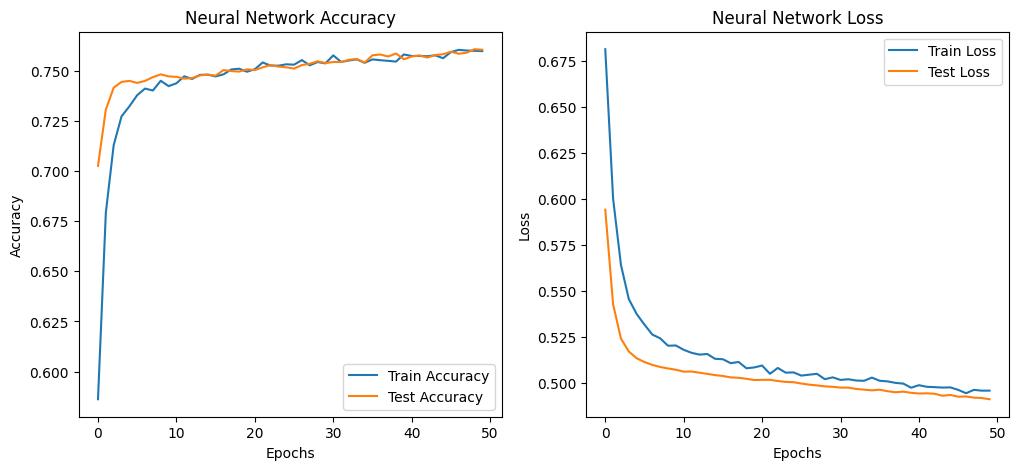

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Random Forest import
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assume df is your DataFrame
X = df.drop(columns=['popular'])
y = df['popular']

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to create the model with Dropout
def create_model(units=64, activation='relu', optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))  # Dropout layer after first dense layer
    model.add(Dense(units // 2, activation=activation))
    model.add(Dropout(dropout_rate))  # Dropout after second dense layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use EarlyStopping with patience of 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set best parameters and increase epochs to 50
model = create_model(units=32, activation='tanh', optimizer='sgd', dropout_rate=0.3)

# Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Neural network predictions (probabilities) for training and testing sets
y_train_nn_pred = model.predict(X_train_scaled)
y_test_nn_pred = model.predict(X_test_scaled)

# Reshape predictions if needed (some ML models might expect 1D array for binary classification)
y_train_nn_pred = y_train_nn_pred.reshape(-1)
y_test_nn_pred = y_test_nn_pred.reshape(-1)

# Concatenate the neural network predictions with the original features
X_train_stacked = np.column_stack((X_train_scaled, y_train_nn_pred))
X_test_stacked = np.column_stack((X_test_scaled, y_test_nn_pred))

# Train the Random Forest model on the stacked data (original features + neural network predictions)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_stacked, y_train)

# Make predictions on the test set using the Random Forest model
y_test_rf_pred = rf_model.predict(X_test_stacked)

# Generate classification report for Random Forest model on the stacked data
print("Classification Report for Random Forest on Stacked Model (Test Set):")
print(classification_report(y_test, y_test_rf_pred))

# Plot training and validation accuracy/loss for the neural network
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Hypertuning New Best:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5814 - loss: 0.7090 - val_accuracy: 0.7227 - val_loss: 0.5641
Epoch 2/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6896 - loss: 0.5948 - val_accuracy: 0.7383 - val_loss: 0.5260
Epoch 3/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7219 - loss: 0.5567 - val_accuracy: 0.7432 - val_loss: 0.5156
Epoch 4/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7242 - loss: 0.5447 - val_accuracy: 0.7474 - val_loss: 0.5119
Epoch 5/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7322 - loss: 0.5381 - val_accuracy: 0.7460 - val_loss: 0.5103
Epoch 6/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7371 - loss: 0.5327 - val_accuracy: 0.7481 - val_loss: 0.5088
Epoch 7/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7399 - loss: 0.5284 - val_accuracy: 0.7492 - val_loss: 0.5079
Epoch 8/50
997/997 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7413 - loss: 0.5267 - val_accuracy: 0.

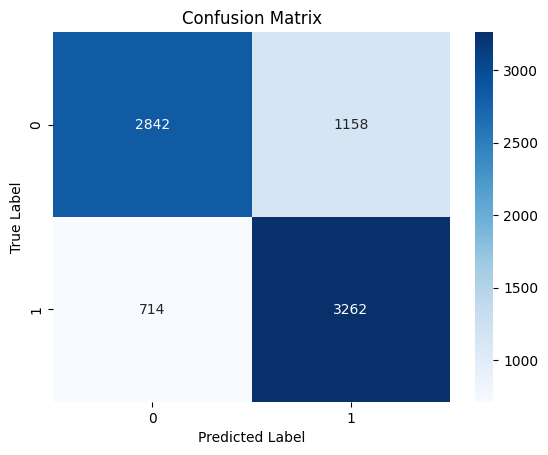

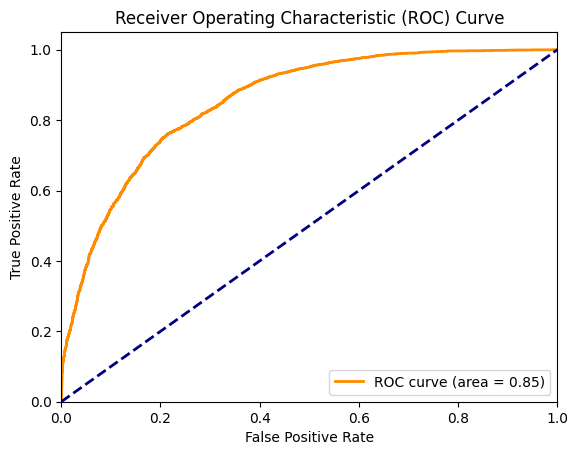

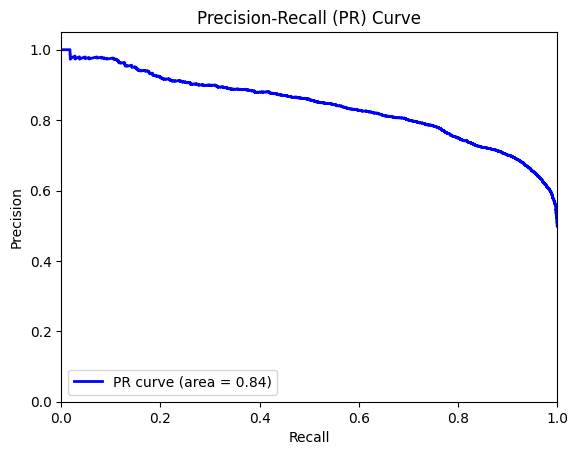

AUROC Score: 0.85


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame
X = df.drop(columns=['popular'])
y = df['popular']

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to create the model with Dropout
def create_model(units=64, activation='relu', optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))  # Dropout layer after first dense layer
    model.add(Dense(units // 2, activation=activation))
    model.add(Dropout(dropout_rate))  # Dropout after second dense layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use EarlyStopping with patience of 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set best parameters and increase epochs to 50
model = create_model(units=32, activation='tanh', optimizer='sgd', dropout_rate=0.3)

# Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Neural network predictions (probabilities) for training and testing sets
y_train_nn_pred = model.predict(X_train_scaled)
y_test_nn_pred = model.predict(X_test_scaled)

# Reshape predictions if needed (some ML models might expect 1D array for binary classification)
y_train_nn_pred = y_train_nn_pred.reshape(-1)
y_test_nn_pred = y_test_nn_pred.reshape(-1)

# Concatenate the neural network predictions with the original features
X_train_stacked = np.column_stack((X_train_scaled, y_train_nn_pred))
X_test_stacked = np.column_stack((X_test_scaled, y_test_nn_pred))

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [10, 20, 30],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_stacked, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best RandomForest Parameters: {best_params}")

# Train the Random Forest model with the best parameters
rf_best_model = RandomForestClassifier(**best_params, random_state=42)
rf_best_model.fit(X_train_stacked, y_train)

# Make predictions on the test set using the best Random Forest model
y_test_rf_pred = rf_best_model.predict(X_test_stacked)
y_test_rf_prob = rf_best_model.predict_proba(X_test_stacked)[:, 1]  # Probabilities for ROC and PR curves

# Generate classification report for Random Forest model on the stacked data
print("Classification Report for Random Forest on Stacked Model (Test Set):")
print(classification_report(y_test, y_test_rf_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_rf_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_rf_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.show()

# AUROC score
roc_auc_score_value = roc_auc_score(y_test, y_test_rf_prob)
print(f'AUROC Score: {roc_auc_score_value:.2f}')


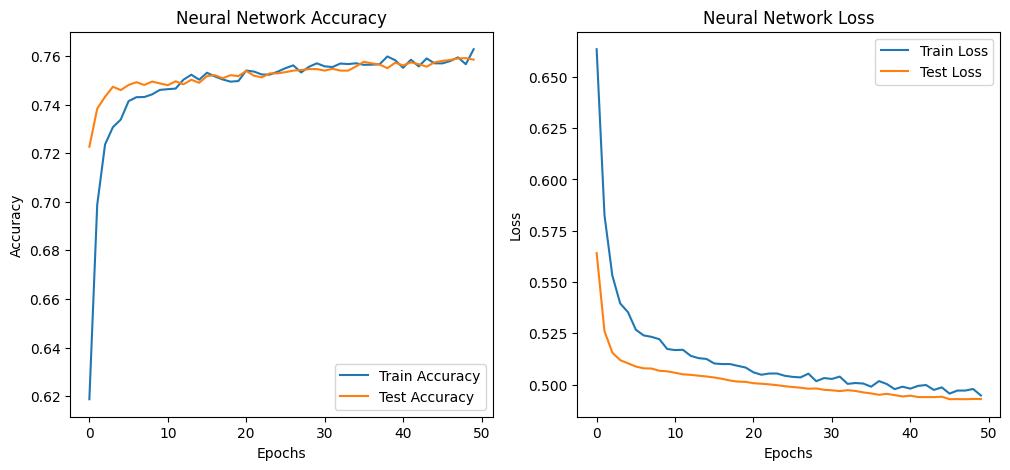

In [ ]:
# Plot training and validation accuracy/loss for the neural network
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [3]:
### Selected Model: DEEP LEARNING + ML(RANDOM FOREST) STACKING

In [39]:
import pandas as pd
import numpy as np

In [40]:
df1 = pd.read_csv("df_popularity.csv")
df1

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
89736,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
89737,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
89738,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [41]:
df = df1.copy()
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
89736,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
89737,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
89738,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [42]:
df['explicit'] = df['explicit'].astype('category')
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')
df['track_genre'] = df['track_genre'].astype('category')

In [43]:
df['popular'] = (df['popularity'] >= 71).astype(int)

In [44]:
df = df.drop(columns=['popularity'])

In [45]:
df = pd.get_dummies(df, columns=['track_genre','explicit', 'key', 'mode', 'time_signature'], drop_first=True)

In [46]:
df.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,...,False,False,False,False,False,False,False,False,True,False
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,...,False,False,False,False,False,True,False,False,True,False
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,...,False,False,False,False,False,True,False,False,True,False
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,...,False,False,False,False,False,True,False,True,False,False
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,...,False,False,False,False,False,True,False,False,True,False


In [47]:
def change_type(df):
    for var in df.columns:
        if df[var].dtype == 'bool':
            df[var] = df[var].astype(int)

change_type(df)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Columns: 140 entries, duration_ms to time_signature_5
dtypes: float64(9), int64(131)
memory usage: 95.9 MB


In [51]:
df['is_acoustic'] = (df['acousticness'] > 0.5).astype(int)
df['is_instrumental'] = (df['instrumentalness'] > 0.5).astype(int)
df['is_live'] = (df['liveness'] > 0.7).astype(int)
df = df.drop(columns=['acousticness', 'instrumentalness', 'liveness'])
print(df.columns)

Index(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'valence', 'tempo', 'popular', 'track_genre_afrobeat',
       'track_genre_alt-rock',
       ...
       'key_10', 'key_11', 'mode_1', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'is_acoustic',
       'is_instrumental', 'is_live'],
      dtype='object', length=140)


In [52]:
df.tail()

,duration_ms,danceability,energy,loudness,speechiness,valence,tempo,popular,track_genre_afrobeat,track_genre_alt-rock,...,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,is_acoustic,is_instrumental,is_live
89735,384999,0.172,0.235,-16.393,0.0422,0.0339,125.995,0,0,0,...,0,0,1,0,0,0,1,1,1,0
89736,385000,0.174,0.117,-18.318,0.0401,0.0350,85.239,0,0,0,...,0,0,0,0,0,1,0,1,1,0
89737,271466,0.629,0.329,-10.895,0.0420,0.7430,132.378,0,0,0,...,0,0,0,0,0,1,0,1,0,0
89738,283893,0.587,0.506,-10.889,0.0297,0.4130,135.960,0,0,0,...,0,0,1,0,0,1,0,0,0,0
89739,241826,0.526,0.487,-10.204,0.0725,0.7080,79.198,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [53]:
df.shape

(89740, 140)

In [54]:
df.describe()

,duration_ms,danceability,energy,loudness,speechiness,valence,tempo,popular,track_genre_afrobeat,track_genre_alt-rock,...,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,is_acoustic,is_instrumental,is_live
count,8.974000e+04,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,...,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,2.291444e+05,0.562166,0.634458,-8.498994,0.087442,0.469474,122.058134,0.030455,0.011132,0.011132,...,0.065623,0.079441,0.636973,0.009427,0.084734,0.886372,0.017662,0.313862,0.185235,0.048329
std,1.129458e+05,0.176692,0.256606,5.221518,0.113278,0.262864,30.117651,0.171836,0.104921,0.104921,...,0.247623,0.270427,0.480875,0.096636,0.278487,0.317361,0.131721,0.464064,0.388490,0.214461
min,8.586000e+03,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.730400e+05,0.450000,0.457000,-10.322250,0.036000,0.249000,99.262750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.132955e+05,0.576000,0.676000,-7.185000,0.048900,0.457000,122.013000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.642930e+05,0.692000,0.853000,-5.108000,0.085900,0.682000,140.077000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.995000,243.372000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.corr()

,duration_ms,danceability,energy,loudness,speechiness,valence,tempo,popular,track_genre_afrobeat,track_genre_alt-rock,...,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,is_acoustic,is_instrumental,is_live
duration_ms,1.000000,-0.064139,0.063258,0.000360,-0.060751,-0.147018,0.026004,-0.018800,0.018128,0.005836,...,0.011668,0.003004,-0.039378,-0.021532,-0.015636,0.035505,-0.029876,-0.087843,0.111944,0.029261
danceability,-0.064139,1.000000,0.143913,0.271838,0.109519,0.492578,-0.021329,0.063043,0.064398,-0.016553,...,0.019173,0.042373,-0.062639,-0.081052,-0.217414,0.268639,-0.085497,-0.188515,-0.175627,-0.088867
energy,0.063258,0.143913,1.000000,0.758774,0.141332,0.256317,0.258629,0.021972,0.028315,0.049439,...,-0.000345,0.051975,-0.075018,-0.066619,-0.220718,0.257925,-0.078955,-0.632366,-0.167959,0.088083
loudness,0.000360,0.271838,0.758774,1.000000,0.055295,0.289095,0.228660,0.063001,0.014415,0.046838,...,-0.011445,0.040720,-0.037111,-0.085867,-0.204469,0.259836,-0.095497,-0.501839,-0.401697,-0.007554
speechiness,-0.060751,0.109519,0.141332,0.055295,1.000000,0.032935,0.004033,-0.009681,-0.000769,-0.030316,...,0.010069,0.017084,-0.040802,0.039150,0.039483,-0.086646,0.106912,0.003903,-0.090971,0.212568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
time_signature_4,0.035505,0.268639,0.257925,0.259836,-0.086646,0.180691,0.062578,0.027084,0.014563,0.017909,...,-0.000545,0.026235,-0.022985,-0.272467,-0.849805,1.000000,-0.374504,-0.231345,-0.086601,-0.039981
time_signature_5,-0.029876,-0.085497,-0.078955,-0.095497,0.106912,-0.059963,-0.041775,-0.013918,-0.003745,-0.012614,...,-0.000687,-0.005917,-0.006615,-0.013081,-0.040799,-0.374504,1.000000,0.067730,0.032752,0.022642
is_acoustic,-0.087843,-0.188515,-0.632366,-0.501839,0.003903,-0.112399,-0.185442,-0.054749,-0.024156,-0.052536,...,0.000549,-0.054833,0.090533,0.068700,0.205337,-0.231345,0.067730,1.000000,0.086019,0.050025
is_instrumental,0.111944,-0.175627,-0.167959,-0.401697,-0.090971,-0.305927,-0.050740,-0.071987,0.024865,-0.038014,...,0.020057,-0.007376,-0.046969,0.039267,0.062054,-0.086601,0.032752,0.086019,1.000000,-0.042581


In [56]:
df = df.drop(columns=['loudness'])
df

,duration_ms,danceability,energy,speechiness,valence,tempo,popular,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,...,key_10,key_11,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,is_acoustic,is_instrumental,is_live
0,230666,0.676,0.4610,0.1430,0.7150,87.917,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,149610,0.420,0.1660,0.0763,0.2670,77.489,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,210826,0.438,0.3590,0.0557,0.1200,76.332,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,201933,0.266,0.0596,0.0363,0.1430,181.740,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,198853,0.618,0.4430,0.0526,0.1670,119.949,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,384999,0.172,0.2350,0.0422,0.0339,125.995,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
89736,385000,0.174,0.1170,0.0401,0.0350,85.239,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
89737,271466,0.629,0.3290,0.0420,0.7430,132.378,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
89738,283893,0.587,0.5060,0.0297,0.4130,135.960,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5473 - loss: 0.7835 - val_accuracy: 0.6856 - val_loss: 0.6294
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 0.6760 - val_accuracy: 0.7212 - val_loss: 0.5826
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6745 - loss: 0.6299 - val_accuracy: 0.7495 - val_loss: 0.5526
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6992 - loss: 0.5944 - val_accuracy: 0.7651 - val_loss: 0.5286
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 0.5862 - val_accuracy: 0.7779 - val_loss: 0.5080
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7470 - loss: 0.5423 - val_accuracy: 0.7861 - val_loss: 0.4908
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7567 - loss: 0.5126 - val_accuracy: 0.7888 - val_loss: 0.4778
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7705 - loss: 0.5012 - val_accuracy: 0.7943 - val_

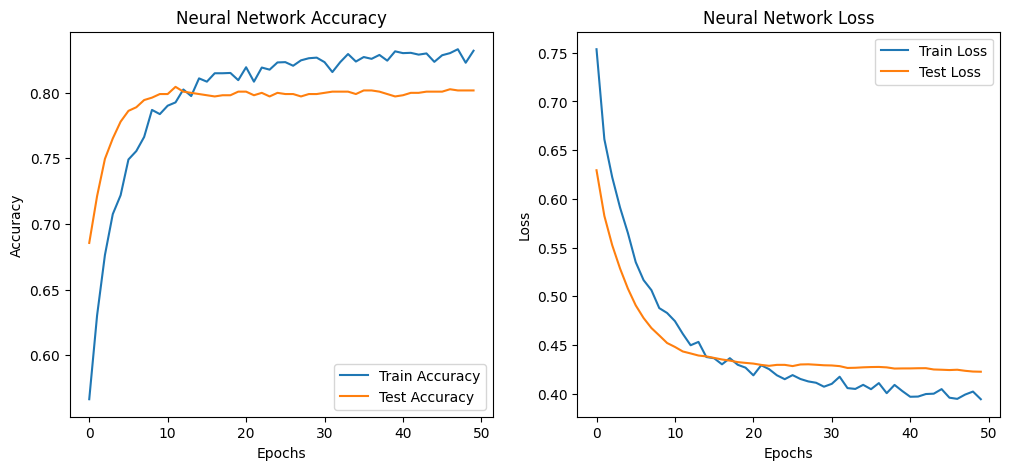

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Random Forest import
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assume df is your DataFrame
X = df.drop(columns=['popular'])
y = df['popular']

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to create the model with Dropout
def create_model(units=64, activation='relu', optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))  # Dropout layer after first dense layer
    model.add(Dense(units // 2, activation=activation))
    model.add(Dropout(dropout_rate))  # Dropout after second dense layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use EarlyStopping with patience of 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set best parameters and increase epochs to 50
model = create_model(units=32, activation='tanh', optimizer='sgd', dropout_rate=0.3)

# Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Neural network predictions (probabilities) for training and testing sets
y_train_nn_pred = model.predict(X_train_scaled)
y_test_nn_pred = model.predict(X_test_scaled)

# Reshape predictions if needed (some ML models might expect 1D array for binary classification)
y_train_nn_pred = y_train_nn_pred.reshape(-1)
y_test_nn_pred = y_test_nn_pred.reshape(-1)

# Concatenate the neural network predictions with the original features
X_train_stacked = np.column_stack((X_train_scaled, y_train_nn_pred))
X_test_stacked = np.column_stack((X_test_scaled, y_test_nn_pred))

# Train the Random Forest model on the stacked data (original features + neural network predictions)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_stacked, y_train)

# Make predictions on the test set using the Random Forest model
y_test_rf_pred = rf_model.predict(X_test_stacked)

# Generate classification report for Random Forest model on the stacked data
print("Classification Report for Random Forest on Stacked Model (Test Set):")
print(classification_report(y_test, y_test_rf_pred))

# Plot training and validation accuracy/loss for the neural network
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
# Classification Report for Random Forest on Stacked Model (Test Set):
#               precision    recall  f1-score   support

#            0       0.86      0.73      0.79       564
#            1       0.75      0.87      0.81       530

#     accuracy                           0.80      1094
#    macro avg       0.80      0.80      0.80      1094
# weighted avg       0.80      0.80      0.80      1094

# Classification Report for Random Forest on Stacked Model (Test Set):(without loudness removed due to high correlation)
#               precision    recall  f1-score   support

#            0       0.85      0.73      0.79       564
#            1       0.75      0.87      0.80       530

#     accuracy                           0.80      1094
#    macro avg       0.80      0.80      0.80      1094
# weighted avg       0.80      0.80      0.80      1094

# Classification Report for Random Forest on Stacked Model (Test Set):(Liveness is made binary - is_live)
#               precision    recall  f1-score   support

#            0       0.86      0.75      0.80       564
#            1       0.77      0.87      0.82       530

#     accuracy                           0.81      1094
#    macro avg       0.81      0.81      0.81      1094
# weighted avg       0.82      0.81      0.81      1094

Classification Report for Random Forest on Stacked Model (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       564
           1       0.77      0.87      0.82       530

    accuracy                           0.81      1094
   macro avg       0.81      0.81      0.81      1094
weighted avg       0.82      0.81      0.81      1094



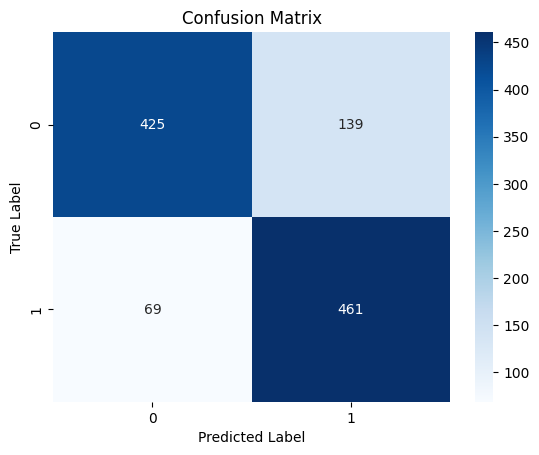

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report for Random Forest model on the stacked data
print("Classification Report for Random Forest on Stacked Model (Test Set):")
print(classification_report(y_test, y_test_rf_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [38]:
# Get all columns that start with 'track_genere_'
columns = [col for col in df.columns if col.startswith('track_genre_')]

# Print the result
print(columns)

['track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'track_genre_garage', 'track_genre_german', 'track_genre_gospel', 'track_genre_goth', 'track_genre_grindcore', 'track_genre_groove', 'tr

In [59]:
pip install joblib

In [60]:
# After training your models, save all necessary components

import joblib
import json
import pickle

# Create a directory to save models if it doesn't exist
import os
if not os.path.exists('model_files'):
    os.makedirs('model_files')

# Save the scaler
joblib.dump(scaler, 'model_files/scaler.joblib')

# Save the neural network model
model.save('model_files/nn_model.h5')

# Save the random forest model
joblib.dump(rf_model, 'model_files/rf_model.joblib')

# Save the feature names
feature_names = X.columns.tolist()
with open('model_files/feature_names.json', 'w') as f:
    json.dump(feature_names, f)

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle
import json
from pathlib import Path

# Create directory for model files if it doesn't exist
Path("model_files").mkdir(exist_ok=True)

# Assume df is your DataFrame
X = df.drop(columns=['popular'])
y = df['popular']

# Save feature names for later use
feature_names = X.columns.tolist()
with open('model_files/feature_names.json', 'w') as f:
    json.dump(feature_names, f)

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
with open('model_files/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Define a function to create the model with Dropout
def create_model(units=64, activation='relu', optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units // 2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use EarlyStopping with patience of 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set best parameters and increase epochs to 50
model = create_model(units=32, activation='tanh', optimizer='sgd', dropout_rate=0.3)

# Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Create a custom predict function for the neural network
class KerasPredictor:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        return self.model.predict(X).reshape(-1)

# Wrap the Keras model
nn_predictor = KerasPredictor(model)

# Save the neural network predictor
with open('model_files/nn_model.pkl', 'wb') as f:
    pickle.dump(nn_predictor, f)

# Neural network predictions (probabilities) for training and testing sets
y_train_nn_pred = model.predict(X_train_scaled)
y_test_nn_pred = model.predict(X_test_scaled)

# Reshape predictions
y_train_nn_pred = y_train_nn_pred.reshape(-1)
y_test_nn_pred = y_test_nn_pred.reshape(-1)

# Concatenate the neural network predictions with the original features
X_train_stacked = np.column_stack((X_train_scaled, y_train_nn_pred))
X_test_stacked = np.column_stack((X_test_scaled, y_test_nn_pred))

# Train the Random Forest model on the stacked data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_stacked, y_train)

# Save the Random Forest model
with open('model_files/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Make predictions on the test set using the Random Forest model
y_test_rf_pred = rf_model.predict(X_test_stacked)

# Generate classification report for Random Forest model on the stacked data
print("Classification Report for Random Forest on Stacked Model (Test Set):")
print(classification_report(y_test, y_test_rf_pred))

# Save the training history
with open('model_files/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Function to verify all files were saved correctly
def verify_saved_models():
    required_files = [
        'model_files/scaler.pkl',
        'model_files/nn_model.pkl',
        'model_files/rf_model.pkl',
        'model_files/feature_names.json',
        'model_files/training_history.pkl'
    ]

    all_files_exist = True
    for file_path in required_files:
        if not Path(file_path).exists():
            print(f"Missing file: {file_path}")
            all_files_exist = False

    if all_files_exist:
        print("All model files were saved successfully!")

        # Test loading each file
        try:
            with open('model_files/scaler.pkl', 'rb') as f:
                scaler_test = pickle.load(f)
            with open('model_files/nn_model.pkl', 'rb') as f:
                nn_model_test = pickle.load(f)
            with open('model_files/rf_model.pkl', 'rb') as f:
                rf_model_test = pickle.load(f)
            with open('model_files/feature_names.json', 'r') as f:
                feature_names_test = json.load(f)
            print("All files loaded successfully!")
        except Exception as e:
            print(f"Error loading files: {str(e)}")

# Verify the saved files
verify_saved_models()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4990 - loss: 0.8160 - val_accuracy: 0.5686 - val_loss: 0.6842
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5637 - loss: 0.7110 - val_accuracy: 0.6536 - val_loss: 0.6354
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6121 - loss: 0.6549 - val_accuracy: 0.6974 - val_loss: 0.6013
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6588 - loss: 0.6195 - val_accuracy: 0.7194 - val_loss: 0.5733
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6725 - loss: 0.6045 - val_accuracy: 0.7514 - val_loss: 0.5443
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7085 - loss: 0.5764 - val_accuracy: 0.7824 - val_loss: 0.5190
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7245 - loss: 0.5499 - val_accuracy: 0.7870 - val_loss: 0.4970
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7543 - loss: 0.5288 - val_accuracy: 0.7888 - val_